In [2]:
%pip install seaborn

In [3]:
#Step 1: Importing libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Load dataset
df = pd.read_csv("task5.csv")
# Basic shape and preview
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()


Rows: 9800, Columns: 18


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
#Step 2: Checking for missing values and duplicates
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().mean() * 100).sort_values(ascending=False)

# Duplicates
duplicates = df.duplicated().sum()

print("Missing values (count):\n", missing)
print("\nMissing values (percent):\n", missing_percent)
print(f"\nNumber of duplicate rows: {duplicates}")


Missing values (count):
 Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

Missing values (percent):
 Postal Code      0.112245
Row ID           0.000000
Order ID         0.000000
Product Name     0.000000
Sub-Category     0.000000
Category         0.000000
Product ID       0.000000
Region           0.000000
State            0.000000
City             0.000000
Country          0.000000
Segment          0.000000
Customer Name    0.000000
Customer ID      0.000000
Ship Mode        0.000000
Ship Date        0.000000
Order Date       0.000000
Sales            0.000000
dtype: float64

Number of duplicate rows: 0


In [6]:
# Step 3: Basic statistical summary of numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [7]:
# Step 4: Converting date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce')

# Check the result
df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


In [8]:
#Step 5: Univariate analysis for categorical columns
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

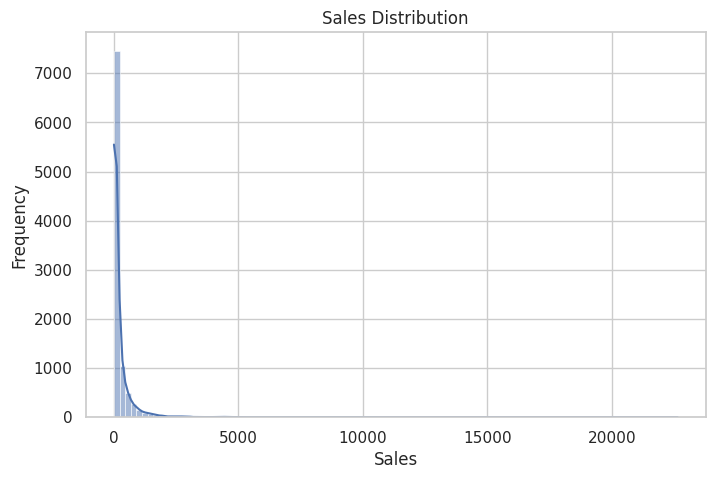

In [12]:
#Step 6: Univariate analysis for numeric column (Sales)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=100, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


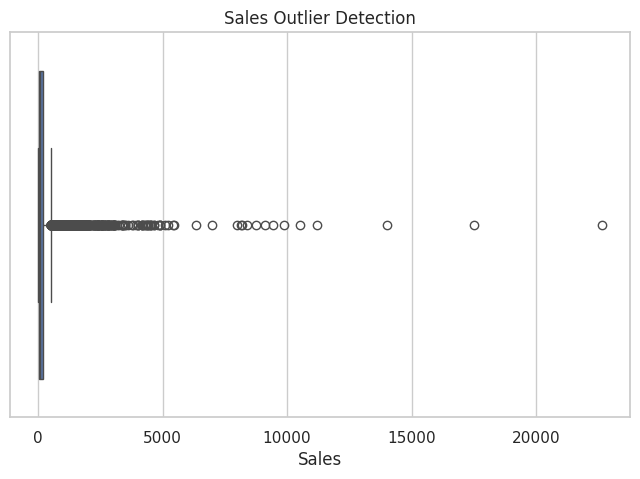

In [13]:
#Step 7: Boxplot for detecting outliers in Sales
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Sales'])
plt.title("Sales Outlier Detection")
plt.xlabel("Sales")
plt.show()


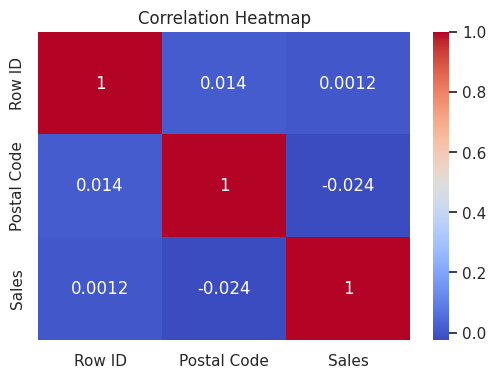

In [14]:
# Step 8: Correlation analysis for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


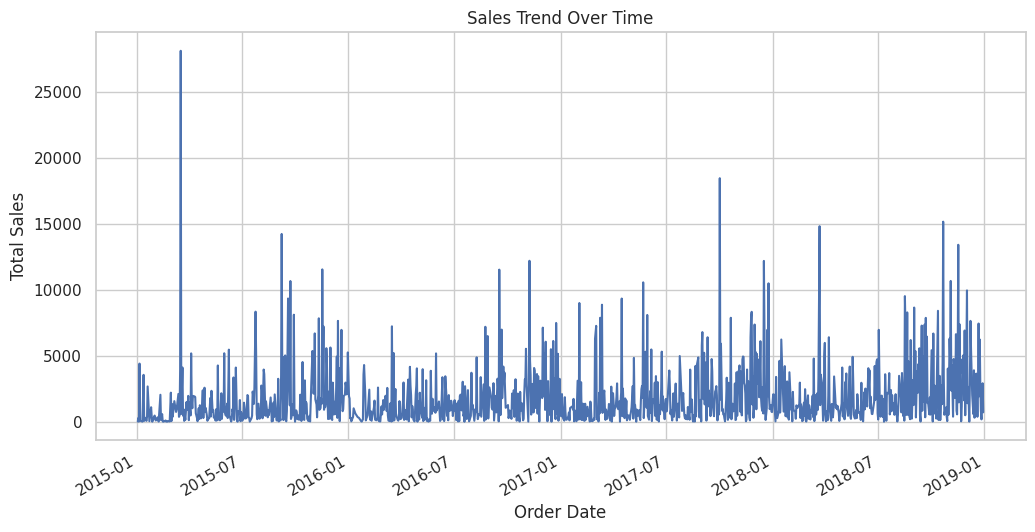

In [15]:
#Step 9: Sales trend over time
sales_trend = df.groupby('Order Date')['Sales'].sum()

# Plot trend
plt.figure(figsize=(12,6))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()


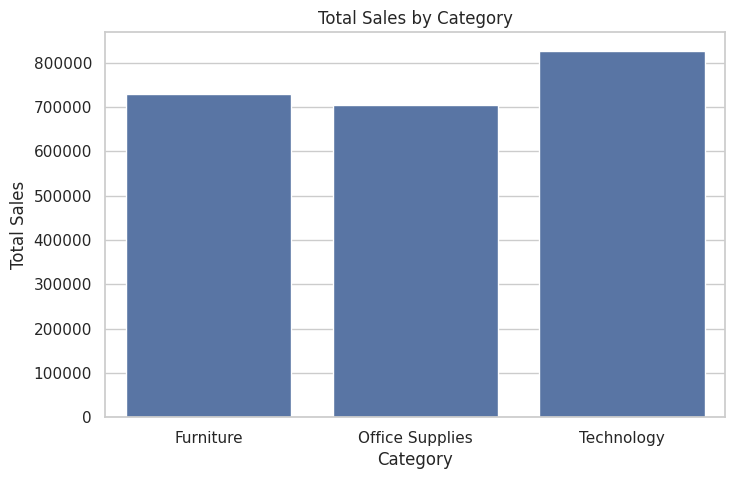

In [17]:
#Step 10: Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, errorbar=None)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


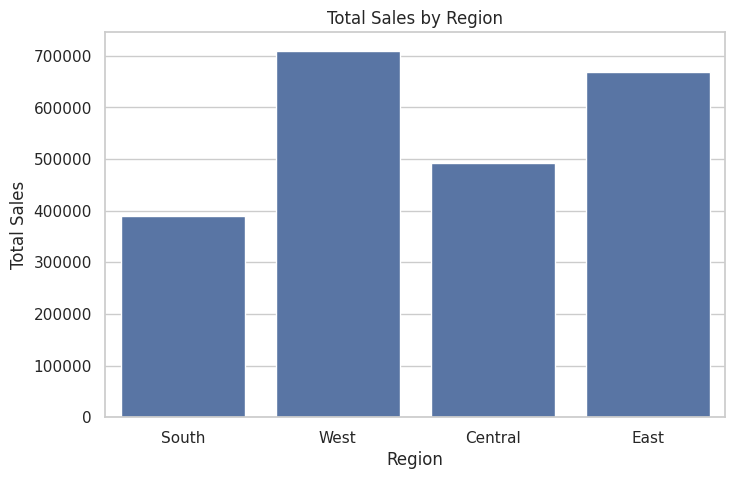

In [19]:
#Step 11: Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, errorbar=None)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


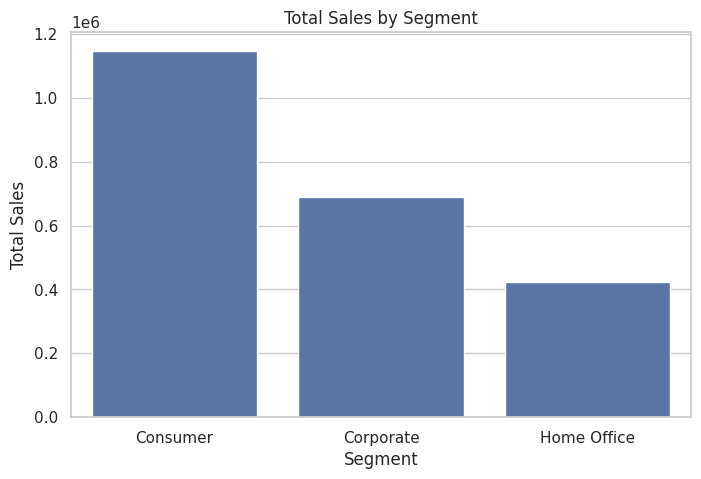

In [21]:
#Step 12: Sales by Segment
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, errorbar=None)
plt.title("Total Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.show()


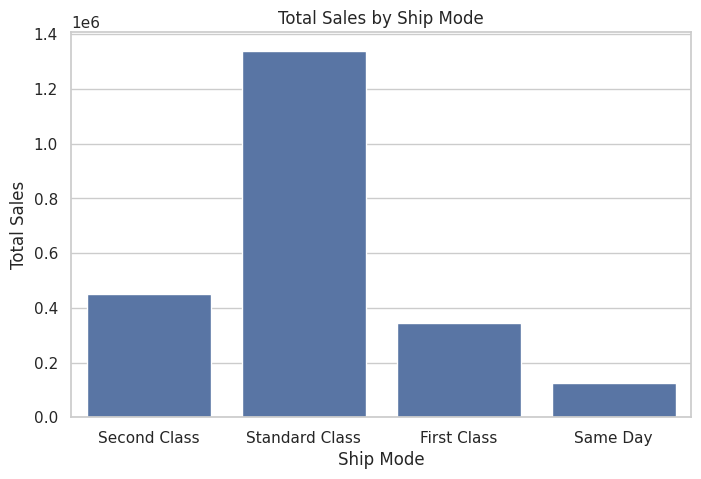

In [23]:
#Step 13: Ship Mode vs Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, errorbar=None)
plt.title("Total Sales by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.show()


In [24]:
#Step 14: Detecting outliers in Sales using IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = df[(df['Sales'] < Q1 - 1.5 * IQR) | (df['Sales'] > Q3 + 1.5 * IQR)]

print(f"Number of outliers in Sales: {len(outliers)}")
outliers.head()


Number of outliers in Sales: 1145


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240


In [25]:
#Step 16: Summary of insights
print("----- EDA Summary -----")
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")
print(f"Missing values found in: {df.columns[df.isna().any()].tolist()}")
print("Highest sales category:", df.groupby('Category')['Sales'].sum().idxmax())
print("Highest sales region:", df.groupby('Region')['Sales'].sum().idxmax())
print("Highest sales segment:", df.groupby('Segment')['Sales'].sum().idxmax())
print(f"Number of sales outliers detected: {len(outliers)}")


----- EDA Summary -----
Total rows: 9800, Total columns: 18
Missing values found in: ['Postal Code']
Highest sales category: Technology
Highest sales region: West
Highest sales segment: Consumer
Number of sales outliers detected: 1145
